# <font color='Blue'>📦 Projeto: Modelagem do Tempo Total de Entrega</font>
<hr style='border: 2px solid Blue;'>

# <font color='orange' style='font-size: 40px;'> Library   </font>
<hr style='border: 2px solid orange;'>

In [16]:
from src.functions import *
import warnings
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings
# from pyspark.sql import SparkSession, Row 
# from pyspark.sql.functions import *
# import pyspark.sql.functions as F

# <font color='orange' style='font-size: 40px;'> 1. Leitura do Dataset </font>
<hr style='border: 2px solid orange;'>

https://www.kaggle.com/datasets/nosbielcs/brazilian-delivery-center?resource=download

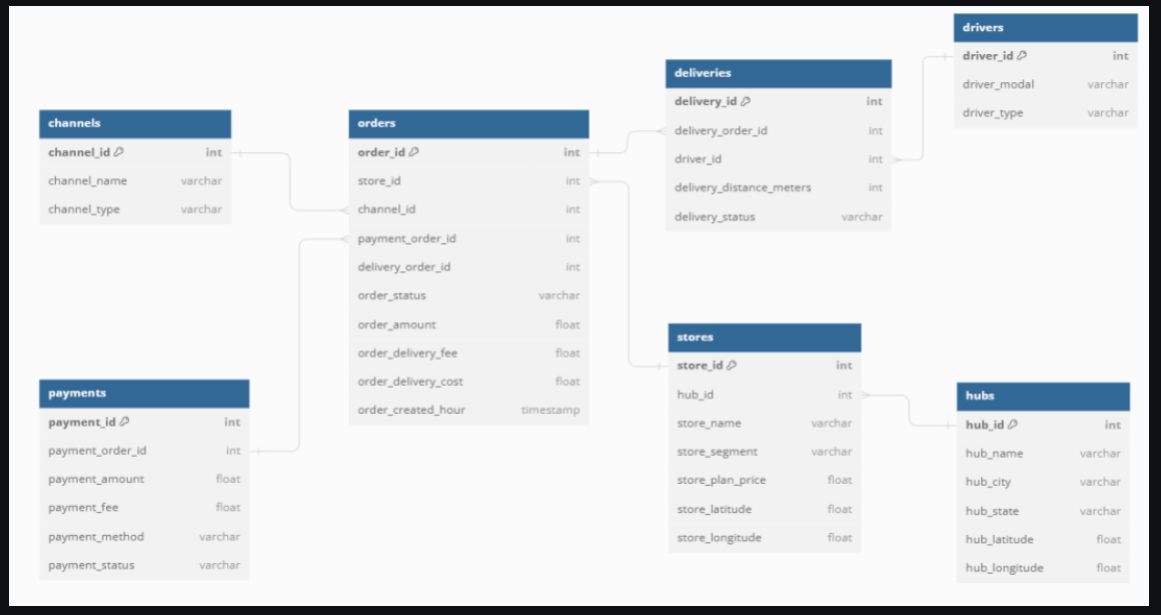


## 1.1.1) Channels

> 1. Este dataset possui informações sobre os canais de venda (marketplaces) onde são vendidos os good e food de nossos lojistas.

- **Channel ID:** Identificador único do canal de vendas.
- **Channel Name:** Nome do canal de vendas.
- **Channel Type:** Tipo de canal de vendas.

## 1.1.2) Deliveries

> 1. Este dataset possui informações sobre as entregas realizadas por nossos entregadores parceiros.

- **Delivery Id:** Identificador único da entrega.
- **Delivery Order ID:** Identificador único do pedido.
- **Driver Id:** Identificador do entregador responsável pela entrega.
- **Delivery Distance Meters:** Distância total percorrida para a entrega, em metros.
- **Delivery Status:** Status atual da entrega.

## 1.1.3) Drivers

> 1. Este dataset possui informações sobre os entregadores parceiros. Eles ficam em nossos hubs e toda vez que um pedido é processado, são eles fazem as entregas na casa dos consumidores.

- **Driver Id:** Identificador único do entregador.
- **Driver Modal:** Modalidade de transporte utilizada pelo entregador.
- **Driver Type:** Tipo de entregador.

## 1.1.4) Hubs

> 1. Este dataset possui informações sobre os hubs do Delivery Center. Entenda que os Hubs são os centros de distribuição dos pedidos e é dali que saem as entregas.

- **Hub ID:** Identificador único do hub.
- **Hub Name:** Nome do hub.
- **Hub City:** Cidade onde o hub está localizado.
- **Hub State:** Estado onde o hub está localizado.
- **Hub Latitude:** Latitude da localização do hub.
- **Hub Longitude:** Longitude da localização do hub.

## 1.1.5) Orders

> 1. Este dataset possui informações sobre as vendas processadas através da plataforma do Delivery Center.

- **Delivery Order ID:** Identificador único do pedido.
- **Store ID:** Identificador da loja que recebeu o pedido.
- **Channel ID:** Identificador do canal pelo qual o pedido foi realizado.
- **Order Status:** Status atual do pedido.
- **Order Amount:** Valor total do pedido.
- **Order Delivery Fee:** Taxa de entrega cobrada ao cliente.
- **Order Delivery Cost:** Custo da entrega para a plataforma ou loja.
- **Order Created Hour:** Hora em que o pedido foi criado.
- **Order Created Minute:** Minuto em que o pedido foi criado.
- **Order Created Day:** Dia em que o pedido foi criado.
- **Order Created Month:** Mês em que o pedido foi criado.
- **Order Created Year:** Ano em que o pedido foi criado.
- **Order Moment Created:** Momento exato em que o pedido foi criado.
- **Order Moment Accepted:** Momento em que o pedido foi aceito pela loja.
- **Order Moment Ready:** Momento em que o pedido ficou pronto para entrega.
- **Order Moment Collected:** Momento em que o pedido foi coletado pelo entregador.
- **Order Moment In Expedition:** Momento em que o pedido entrou em expedição.
- **Order Moment Delivering:** Momento em que o pedido está sendo entregue.
- **Order Moment Delivered:** Momento em que o pedido foi entregue ao cliente.
- **Order Moment Finished:** Momento em que o pedido foi finalizado no sistema.

## 1.1.6) Payments

> 1. Este dataset possui informações sobre os pagamentos realizados ao Delivery Center.

- **Payment ID:** Identificador único do pagamento.
- **Delivery Order ID:** Identificador único do pedido.
- **Payment Amount:** Valor total pago pelo cliente.
- **Payment Fee:** Taxa de processamento do pagamento.
- **Payment Method:** Método de pagamento utilizado pelo cliente.
- **Payment Status:** Status atual do pagamento.

## 1.1.7) Stores

> 1. Este dataset possui informações sobre os lojistas. Eles utilizam a Plataforma do Delivery Center para vender seus itens (good e/ou food) nos marketplaces.

- **Store ID:** Identificador único da loja.
- **Hub ID:** Identificador do hub ao qual a loja está associada.
- **Store Name:** Nome da loja.
- **Store Segment:** Segmento ou categoria da loja.
- **Store Plan Price:** Preço do plano de assinatura da loja na plataforma.
- **Store Latitude:** Latitude da localização da loja.
- **Store Longitude:** Longitude da localização da loja.


In [2]:
df_orders = (
    pd.read_csv('../Modelo_Delivery/data/orders.csv')
    .drop(['order_id', 'payment_order_id'], axis = 1)
    .rename(
        {
            'delivery_order_id':'delivery_order_id',
            'channel_id':'channel_id',
            'store_id':'store_id',
        },
        axis = 1
    )
)
df_channels = pd.read_csv('../Modelo_Delivery/data/channels.csv')
df_deliveries = pd.read_csv('../Modelo_Delivery/data/deliveries.csv')
df_drivers = pd.read_csv('../Modelo_Delivery/data/drivers.csv')
df_hubs = pd.read_csv('../Modelo_Delivery/data/hubs.csv', encoding='latin-1')
df_payments = pd.read_csv('../Modelo_Delivery/data/payments.csv').rename({'payment_order_id':'delivery_order_id'}, axis=1)
df_stores = pd.read_csv('../Modelo_Delivery/data/stores.csv', encoding='latin-1')

In [3]:
colunas_renomeadas = {
    # ------------------- ORDERS -------------------
    'store_id': 'id_loja',
    'channel_id': 'id_canal',
    'delivery_order_id': 'id_pedido_entrega',
    'order_status': 'status_pedido',
    'order_amount': 'valor_pedido',
    'order_delivery_fee': 'taxa_entrega_cliente',
    'order_delivery_cost': 'custo_entrega_plataforma',
    'order_created_hour': 'hora_criacao_pedido',
    'order_created_minute': 'minuto_criacao_pedido',
    'order_created_day': 'dia_criacao_pedido',
    'order_created_month': 'mes_criacao_pedido',
    'order_created_year': 'ano_criacao_pedido',
    'order_moment_created': 'momento_criacao_pedido',
    'order_moment_accepted': 'momento_aceite_pedido',
    'order_moment_ready': 'momento_pedido_pronto',
    'order_moment_collected': 'momento_pedido_coletado',
    'order_moment_in_expedition': 'momento_pedido_expedicao',
    'order_moment_delivering': 'momento_pedido_em_entrega',
    'order_moment_delivered': 'momento_pedido_entregue',
    'order_moment_finished': 'momento_pedido_finalizado',

    # Métricas de tempo do pedido
    'order_metric_collected_time': 'tempo_coleta_pedido',
    'order_metric_paused_time': 'tempo_pedido_pausado',
    'order_metric_production_time': 'tempo_producao_pedido',
    'order_metric_walking_time': 'tempo_deslocamento_pedido',
    'order_metric_expediton_speed_time': 'tempo_expedicao_pedido',
    'order_metric_transit_time': 'tempo_transito_pedido',
    'order_metric_cycle_time': 'tempo_ciclo_pedido',

    # ------------------- CHANNELS -------------------
    'channel_name': 'nome_canal',
    'channel_type': 'tipo_canal',

    # ------------------- PAYMENTS -------------------
    'payment_id': 'id_pagamento',
    'payment_amount': 'valor_pagamento',
    'payment_fee': 'taxa_pagamento',
    'payment_method': 'metodo_pagamento',
    'payment_status': 'status_pagamento',

    # ------------------- DELIVERIES -------------------
    'delivery_id': 'id_entrega',
    'driver_id': 'id_entregador',
    'delivery_distance_meters': 'distancia_entrega_metros',
    'delivery_status': 'status_entrega',

    # ------------------- STORES -------------------
    'store_name': 'nome_loja',
    'store_segment': 'segmento_loja',
    'store_plan_price': 'preco_plano_loja',
    'store_latitude': 'latitude_loja',
    'store_longitude': 'longitude_loja',

    # ------------------- DRIVERS -------------------
    'driver_modal': 'modal_entregador',
    'driver_type': 'tipo_entregador',

    # ------------------- HUBS -------------------
    'hub_id': 'id_hub',
    'hub_name': 'nome_hub',
    'hub_city': 'cidade_hub',
    'hub_state': 'estado_hub',
    'hub_latitude': 'latitude_hub',
    'hub_longitude': 'longitude_hub',
}


df_full = (
    df_orders
    .merge(df_channels, on='channel_id', how='left') # Merge OK
    .merge(df_payments, on='delivery_order_id', how='left') # Merge Ok
    .merge(df_deliveries, on='delivery_order_id', how='left')
    .merge(df_stores, on='store_id', how='left')
    .merge(df_drivers, on='driver_id', how='left')
    .merge(df_hubs, on='hub_id', how='left')
)

df_full.rename(columns=colunas_renomeadas, inplace=True)

tempos = [
    'momento_criacao_pedido', 'momento_aceite_pedido', 'momento_pedido_pronto',
    'momento_pedido_coletado', 'momento_pedido_expedicao', 'momento_pedido_em_entrega',
    'momento_pedido_entregue', 'momento_pedido_finalizado'
]

for col in tempos:
    df_full[col] = pd.to_datetime(df_full[col], errors='coerce')

df_full["data_pedido"] = df_full["momento_criacao_pedido"].dt.date
df_full["dia_semana"] = df_full["momento_criacao_pedido"].dt.day_name()
df_full["hora_pedido"] = df_full["momento_criacao_pedido"].dt.hour


df_target = df_full.copy()

display(df_target.shape)
df_target.head()

(442239, 54)

,id_loja,id_canal,id_pedido_entrega,status_pedido,valor_pedido,taxa_entrega_cliente,custo_entrega_plataforma,hora_criacao_pedido,minuto_criacao_pedido,dia_criacao_pedido,mes_criacao_pedido,ano_criacao_pedido,momento_criacao_pedido,momento_aceite_pedido,momento_pedido_pronto,momento_pedido_coletado,momento_pedido_expedicao,momento_pedido_em_entrega,momento_pedido_entregue,momento_pedido_finalizado,tempo_coleta_pedido,tempo_pedido_pausado,tempo_producao_pedido,tempo_deslocamento_pedido,tempo_expedicao_pedido,tempo_transito_pedido,tempo_ciclo_pedido,nome_canal,tipo_canal,id_pagamento,valor_pagamento,taxa_pagamento,metodo_pagamento,status_pagamento,id_entrega,id_entregador,distancia_entrega_metros,status_entrega,id_hub,nome_loja,segmento_loja,preco_plano_loja,latitude_loja,longitude_loja,modal_entregador,tipo_entregador,nome_hub,cidade_hub,estado_hub,latitude_hub,longitude_hub,data_pedido,dia_semana,hora_pedido
0,3512,5,68405119,CANCELED,62.70,0.00,NaN,0,1,1,1,2021,2021-01-01 00:01:36,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOOD PLACE,MARKETPLACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,GOI SIPIMUSU,FOOD,49.00,-25.48,-49.29,NaN,NaN,PYTHON SHOPPING,CURITIBA,PR,-25.48,-49.29,2021-01-01,Friday,0
1,3512,5,68405123,CANCELED,62.70,0.00,NaN,0,4,1,1,2021,2021-01-01 00:04:26,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOOD PLACE,MARKETPLACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,GOI SIPIMUSU,FOOD,49.00,-25.48,-49.29,NaN,NaN,PYTHON SHOPPING,CURITIBA,PR,-25.48,-49.29,2021-01-01,Friday,0
2,3512,5,68405206,CANCELED,115.50,0.00,NaN,0,13,1,1,2021,2021-01-01 00:13:07,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOOD PLACE,MARKETPLACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,GOI SIPIMUSU,FOOD,49.00,-25.48,-49.29,NaN,NaN,PYTHON SHOPPING,CURITIBA,PR,-25.48,-49.29,2021-01-01,Friday,0
3,3401,5,68405465,CANCELED,55.90,0.00,NaN,0,19,1,1,2021,2021-01-01 00:19:15,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOOD PLACE,MARKETPLACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,FRUEOU,FOOD,49.90,-25.44,-49.28,NaN,NaN,HOTMILK SHOPPING,CURITIBA,PR,-25.44,-49.28,2021-01-01,Friday,0
4,3401,5,68406064,CANCELED,37.90,0.00,NaN,0,26,1,1,2021,2021-01-01 00:26:25,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOOD PLACE,MARKETPLACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,FRUEOU,FOOD,49.90,-25.44,-49.28,NaN,NaN,HOTMILK SHOPPING,CURITIBA,PR,-25.44,-49.28,2021-01-01,Friday,0


# <font color='orange' style='font-size: 40px;'> 2. Criação da Target </font>
<hr style='border: 2px solid orange;'>

> **Objetivo:** Criar a Target e preparar as Amostras de Treino, Validação, Teste e Out-Of-Time

# <font color='green' style='font-size: 30px;'> 2.1) Criação da Target </font>
<hr style='border: 2px solid green;'>



In [4]:
df_target["tempo_entrega"] = (df_target["momento_pedido_finalizado"] - df_target["momento_aceite_pedido"]).dt.total_seconds() / 60
df_target = df_target.loc[(df_target["status_pedido"] == 'FINISHED') & (df_target["status_entrega"] == 'DELIVERED') & df_target["tempo_entrega"].between(15, 260)].copy()

📊 ANÁLISE PSI TEMPORAL
Período base: 2021-01-01 a 2021-02-01
Período atual: 2021-03-30 a 2021-04-30
Registros base: 82,280 | Registros atual: 124,265


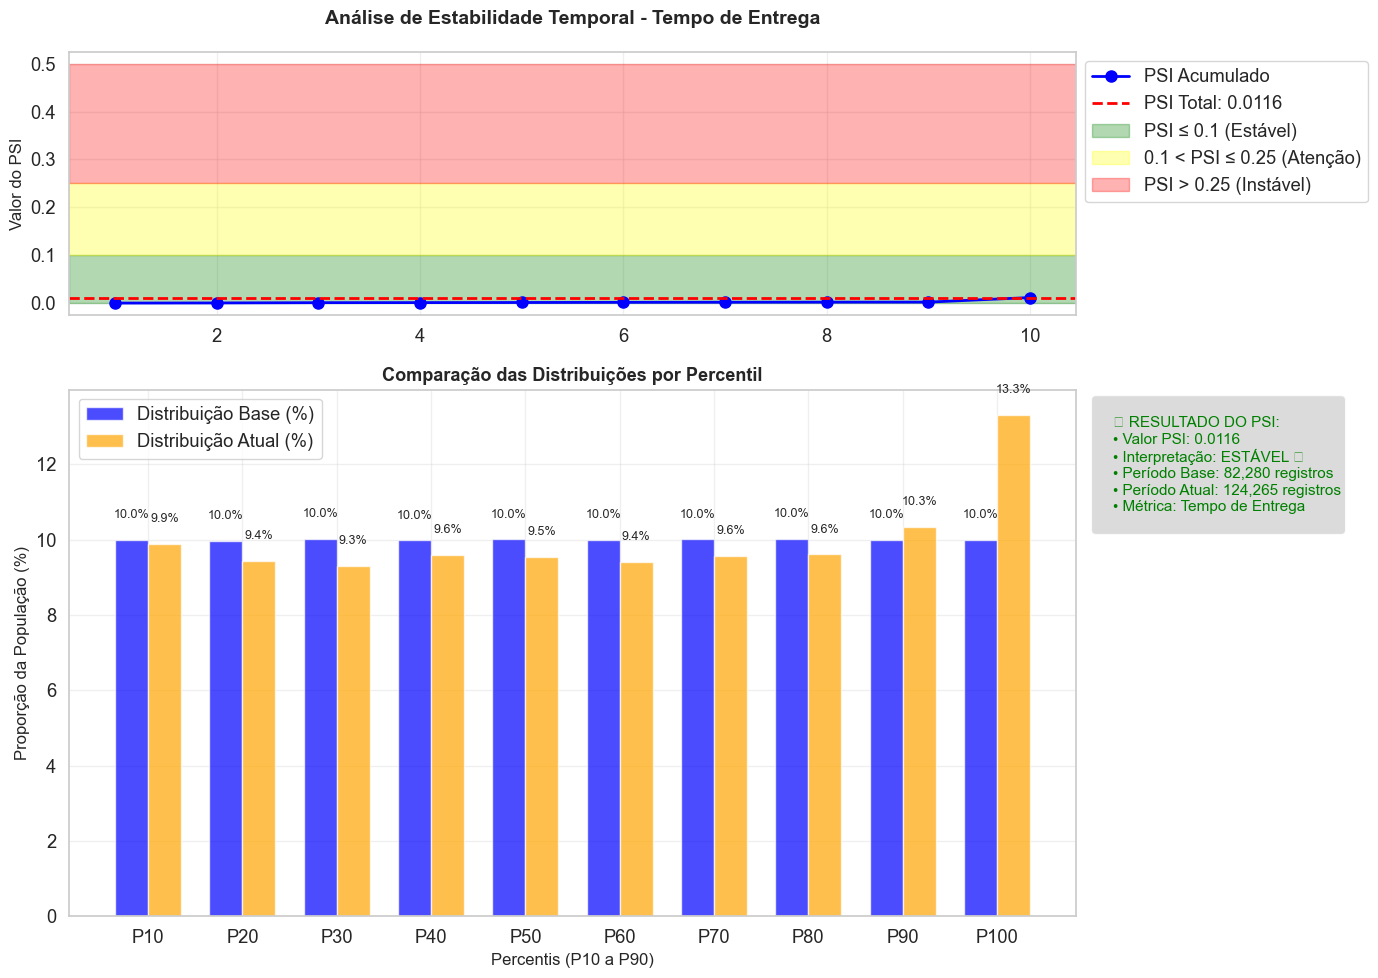


🎯 RESULTADO FINAL: PSI = 0.0116 - ESTÁVEL ✅


In [15]:
psi, detalhes = calcular_psi_temporal(df_target[['tempo_entrega', 'data_pedido']], 'data_pedido', 'tempo_entrega', 'Tempo de Entrega')

🔍 ANÁLISE DE RELACIONAMENTOS ENTRE IDs:
Quantidade de Registros: 395,770

id_loja único: 836 - Identificador único da loja.
id_canal único: 38 - Identificador único do canal de vendas.
id_pedido_entrega único: 327,765 - Identificador único do pedido de entrega.
id_pagamento único: 375,555 - Identificador único do pagamento.
id_entrega único: 345,393 - Identificador único da entrega.
id_entregador único: 4,530 - Identificador único do entregador.
id_hub único: 27 - Identificador único do hub.

Entregas com múltiplos pedidos: 0

Existem 55 variáveis no Dataset
Existem 31 variáveis sem registros nulos no Dataset


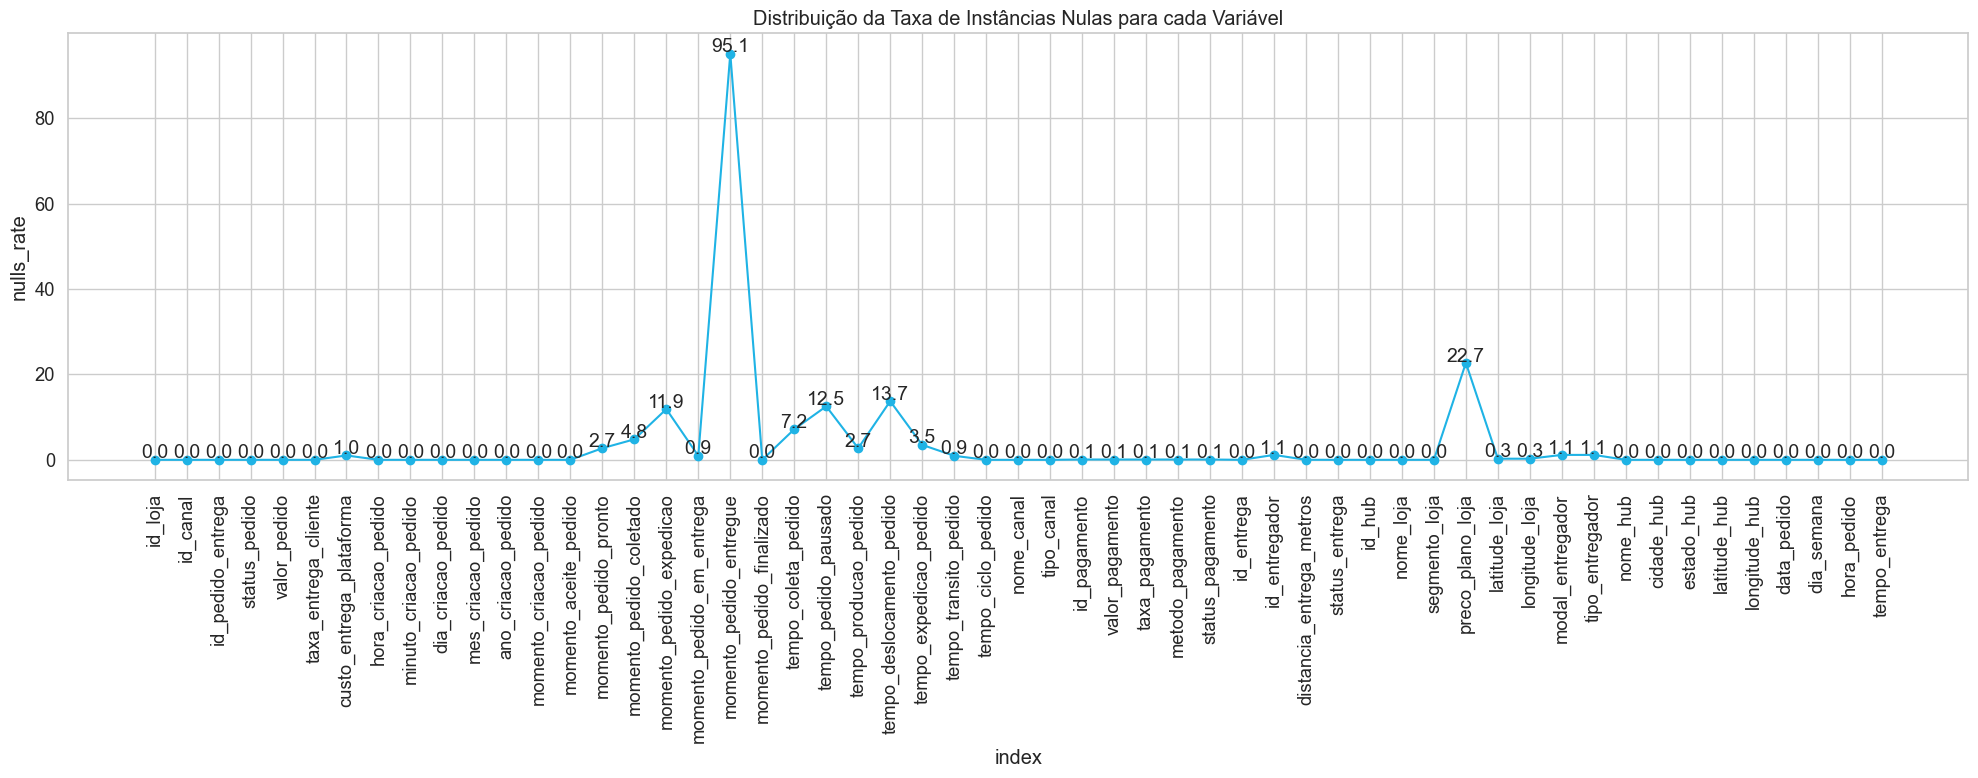

In [41]:
print("🔍 ANÁLISE DE RELACIONAMENTOS ENTRE IDs:")

print(f"Quantidade de Registros: {df_target.shape[0]:,}")
print()
print(f"id_loja único: {df_target['id_loja'].nunique():,} - Identificador único da loja.")
print(f"id_canal único: {df_target['id_canal'].nunique():,} - Identificador único do canal de vendas.")
print(f"id_pedido_entrega único: {df_target['id_pedido_entrega'].nunique():,} - Identificador único do pedido de entrega.")
print(f"id_pagamento único: {df_target['id_pagamento'].nunique():,} - Identificador único do pagamento.")
print(f"id_entrega único: {df_target['id_entrega'].nunique():,} - Identificador único da entrega.")
print(f"id_entregador único: {df_target['id_entregador'].nunique():,} - Identificador único do entregador.")
print(f"id_hub único: {df_target['id_hub'].nunique():,} - Identificador único do hub.")

# Verificar se há múltiplos pedidos_entrega para mesma entrega
pedidos_por_entrega = df_target.groupby('id_entrega')['id_pedido_entrega'].nunique()
print(f"\nEntregas com múltiplos pedidos: {(pedidos_por_entrega > 1).sum()}")
print()

# Análise de Nulos
df_nulls = (
    pd.DataFrame(
        df_target
        .isnull().sum()
      )
      .reset_index()
      .rename({0:'nulls_amnt'}, axis = 1)
)
df_nulls['nulls_rate'] = round((df_nulls['nulls_amnt']/df_target.shape[0])*100, 2)

print(f'Existem {len(df_nulls)} variáveis no Dataset')
df_not_nulls_nulls = df_nulls.loc[df_nulls['nulls_rate'] == 0]
columns_not_nulls = list(df_not_nulls_nulls['index'])
print(f'Existem {len(columns_not_nulls)} variáveis sem registros nulos no Dataset')

plota_grafico_linhas(df_nulls, "index", "nulls_rate", True, "Distribuição da Taxa de Instâncias Nulas para cada Variável")

In [46]:
df_target.loc[~df_target['id_pedido_entrega'].isnull()].shape

(395770, 55)

In [51]:
df_target.loc[df_target['id_entrega'] == 3108733.00].drop_duplicates()

,id_loja,id_canal,id_pedido_entrega,status_pedido,valor_pedido,taxa_entrega_cliente,custo_entrega_plataforma,hora_criacao_pedido,minuto_criacao_pedido,dia_criacao_pedido,mes_criacao_pedido,ano_criacao_pedido,momento_criacao_pedido,momento_aceite_pedido,momento_pedido_pronto,momento_pedido_coletado,momento_pedido_expedicao,momento_pedido_em_entrega,momento_pedido_entregue,momento_pedido_finalizado,tempo_coleta_pedido,tempo_pedido_pausado,tempo_producao_pedido,tempo_deslocamento_pedido,tempo_expedicao_pedido,tempo_transito_pedido,tempo_ciclo_pedido,nome_canal,tipo_canal,id_pagamento,valor_pagamento,taxa_pagamento,metodo_pagamento,status_pagamento,id_entrega,id_entregador,distancia_entrega_metros,status_entrega,id_hub,nome_loja,segmento_loja,preco_plano_loja,latitude_loja,longitude_loja,modal_entregador,tipo_entregador,nome_hub,cidade_hub,estado_hub,latitude_hub,longitude_hub,data_pedido,dia_semana,hora_pedido,tempo_entrega
389731,56,5,90945484,FINISHED,42.40,6.90,12.00,23,15,17,4,2021,2021-04-17 23:15:28,2021-04-17 23:15:31,2021-04-17 23:34:05,2021-04-17 23:35:21,2021-04-17 23:35:22,2021-04-17 23:38:41,NaT,2021-04-17 23:50:24,1.25,3.32,18.62,1.27,4.60,11.72,34.92,FOOD PLACE,MARKETPLACE,5346921.00,39.30,0.59,ONLINE,PAID,3108733.00,NaN,827.00,DELIVERED,8,SUPSIO,FOOD,49.00,-22.92,-43.23,NaN,NaN,GOLDEN SHOPPING,RIO DE JANEIRO,RJ,-22.92,-43.23,2021-04-17,Saturday,23,34.88
389733,56,5,90945484,FINISHED,42.40,6.90,12.00,23,15,17,4,2021,2021-04-17 23:15:28,2021-04-17 23:15:31,2021-04-17 23:34:05,2021-04-17 23:35:21,2021-04-17 23:35:22,2021-04-17 23:38:41,NaT,2021-04-17 23:50:24,1.25,3.32,18.62,1.27,4.60,11.72,34.92,FOOD PLACE,MARKETPLACE,5346922.00,10.00,0.00,VOUCHER,PAID,3108733.00,NaN,827.00,DELIVERED,8,SUPSIO,FOOD,49.00,-22.92,-43.23,NaN,NaN,GOLDEN SHOPPING,RIO DE JANEIRO,RJ,-22.92,-43.23,2021-04-17,Saturday,23,34.88


In [45]:
df_target.groupby('id_entrega', as_index = False)['id_pedido_entrega'].count().sort_values(by = 'id_pedido_entrega', ascending = False)

,id_entrega,id_pedido_entrega
46812,2296235.00,9
321060,3029788.00,7
219826,2761260.00,7
268439,2892618.00,7
268744,2893451.00,7
...,...,...
345388,3110155.00,1
345389,3111780.00,1
345390,3112562.00,1
345391,3123749.00,1


In [50]:
aaa = df_target.groupby('id_entrega', as_index = False)['id_pedido_entrega'].count().sort_values(by = 'id_pedido_entrega', ascending = False)
aaa.loc[aaa['id_pedido_entrega'] > 1]

,id_entrega,id_pedido_entrega
46812,2296235.00,9
321060,3029788.00,7
219826,2761260.00,7
268439,2892618.00,7
268744,2893451.00,7
...,...,...
345358,3093124.00,2
345363,3093281.00,2
345367,3108733.00,2
345368,3108734.00,2


# <font color='green' style='font-size: 30px;'> 2.2) Criação das Amostras de Treino, Validação, Teste e Out-Of-Time </font>
<hr style='border: 2px solid green;'>

> 1. A fim de evitar Data Leakage, decidiu-se separar os dados em treino, validação, teste e oot

> 2. Para cenário, separou-se da seguinte maneira:

- Treino + Validação --> 80% dos IDs entre 202101 e 202103, sendo 90% para Treinamento do Modelo e 10% para Validação.
- Teste --> 20% dos IDs do treino
- OOT --> Todos os IDs para 202104

### Considerações

-  '202101', --> TREINAMENTO/VALIDACAO/TESTE
-  '202102', --> TREINAMENTO/VALIDACAO/TESTE
-  '202103', --> TREINAMENTO/VALIDACAO/TESTE
-  '202104', --> OOT



In [ ]:
amostra_treino_validacao = (
    df_target
        .loc[~df_target["safra"].isin(["201601", "201602", "201609", "201610", "201611"])]
        [["msno"]]
        .drop_duplicates()
        .sample(frac = 0.8, random_state = 42, replace = False)
)

train = (
    amostra_treino_validacao.sample(frac = 0.9, random_state = 42, replace = False)
    [["msno"]]
    .drop_duplicates()
) 

valid = (
    amostra_treino_validacao.loc[~amostra_treino_validacao["msno"].isin(list(train["msno"].unique()))]
    [["msno"]]
    .drop_duplicates()
)

test = (
    df_target
        .loc[
            (~df_target["safra"].isin(["201601", "201602", "201609", "201610", "201611"])) & 
            (~df_target["msno"].isin(list(train["msno"].unique()))) & 
            (~df_target["msno"].isin(list(valid["msno"].unique())))
        ]
        [["msno"]]
        .drop_duplicates()
)

oot = (
    df_target
        .loc[
            (df_target["safra"].isin(["201609"]))
        ]
        [["msno"]]
        .drop_duplicates()
)

df_train = train.merge(df_target.loc[~df_target["safra"].isin(["201601", "201602", "201609", "201610", "201611"])], on = "msno", how = "left")
df_valid = valid.merge(df_target.loc[~df_target["safra"].isin(["201601", "201602", "201609", "201610", "201611"])], on = "msno", how = "left")
df_test = test.merge(df_target.loc[~df_target["safra"].isin(["201601", "201602", "201609", "201610", "201611"])], on = "msno", how = "left")
df_oot = oot.merge(df_target.loc[df_target["safra"].isin(["201609"])], on = "msno", how = "left")

print(f"A quantidade de amostras no Treino (201603~201608) é: {df_train.shape[0]}")
print(f"A quantidade de amostras na Validação (201603~201608) é: {df_valid.shape[0]}")
print(f"A quantidade de amostras no Teste (201603~201608) é: {df_test.shape[0]}")
print(f"A quantidade de amostras no OOT (201609) é: {df_oot.shape[0]}")

amostras = [df_train, df_valid, df_test, df_oot]
tipo = ["Treino", "Validação", "Teste", "OOT"]
i = 0
for amostra in amostras:
    plota_barras(['churn'], amostra, f'Distribuição de clientes ativos (0) e clientes com Churn (1) - Amostra {tipo[i]}', 0)

    i = i + 1

# <font color='orange' style='font-size: 40px;'> 3. Criação de Features </font>
<hr style='border: 2px solid orange;'>

> **Objetivo:** Criar Features 

> **Pontos de Observação**: Trata-se de um problema de Interpolação, ou seja, embora tenhamos a série histórica de pedidos diários, os pedidos são dependentes apenas dentro de um mesmo dia e independentes em dias distintos. 


# <font color='green' style='font-size: 30px;'> 3.1) Criação das Features </font>
<hr style='border: 2px solid green;'>



# <font color='orange' style='font-size: 40px;'> 4. Modelagem </font>
<hr style='border: 2px solid orange;'>

> **Objetivo:** Criar o Modelo e Otimizar 